In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
from IPython.html.widgets import *

C:\Users\eecsu\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import scipy.stats as sstats 

## Import KDE function

Kernel density estimation (KDE) is used to construct the approximation push-forward of the prior density. 
To read more on KDE, see https://en.wikipedia.org/wiki/Kernel_density_estimation. 

To see what the `scipy` KDE is doing, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html.

In [4]:
from scipy.stats import gaussian_kde as gkde

## Sample from $\Lambda$

Assuming a $N(0,I)$ distribution for the prior on $\Lambda=\mathbb{R}^5$.

In [5]:
num_samples = int(1E4)
lam = np.random.normal(size=(5,num_samples))

# Look at some statistics of these samples
print('sample mean = \n', np.mean(lam,axis=1),'\n')
print('sample cov  = \n', np.cov(lam))

sample mean = 
 [-0.0146978  -0.00195146 -0.01144745  0.0156505  -0.01629434] 

sample cov  = 
 [[  1.00085302e+00  -5.96981236e-03   1.41569061e-02   5.47624433e-03
   -9.79787423e-03]
 [ -5.96981236e-03   1.01047389e+00   1.03998950e-02  -2.81644529e-03
    4.20021648e-03]
 [  1.41569061e-02   1.03998950e-02   9.83047455e-01  -4.02631101e-03
    5.26378840e-03]
 [  5.47624433e-03  -2.81644529e-03  -4.02631101e-03   9.99655007e-01
   -8.60793190e-05]
 [ -9.79787423e-03   4.20021648e-03   5.26378840e-03  -8.60793190e-05
    1.00234586e+00]]


## Create KDE of samples on $\Lambda$ or use specified density on $\Lambda$

***The KDE is not necessary if the density on the input space is already specified***

Here, we just do this to show how the density estimator works compared to the exact density.
The KDE is not necessary except for the push-forward density. 

In [6]:
prior_dens_kde = gkde(lam) 

prior_dens = sstats.multivariate_normal(mean=np.zeros(5), cov=np.eye(5)) #Exact density

In [7]:
x = np.linspace(-5,5,1000)
z = np.ones(1000)

# Define arrays of points in different directions in \Lambda
pts1 = np.array([x,0*z,0*z,0*z,0*z])
pts2 = np.array([x,z,0*z,0*z,0*z])
pts3 = np.array([x,x,0*z,0*z,0*z])
pts4 = np.array([0*z,0*z,x,0*z,0*z])
pts5 = np.array([x,x,x,x,x])

<IPython.core.display.Javascript object>


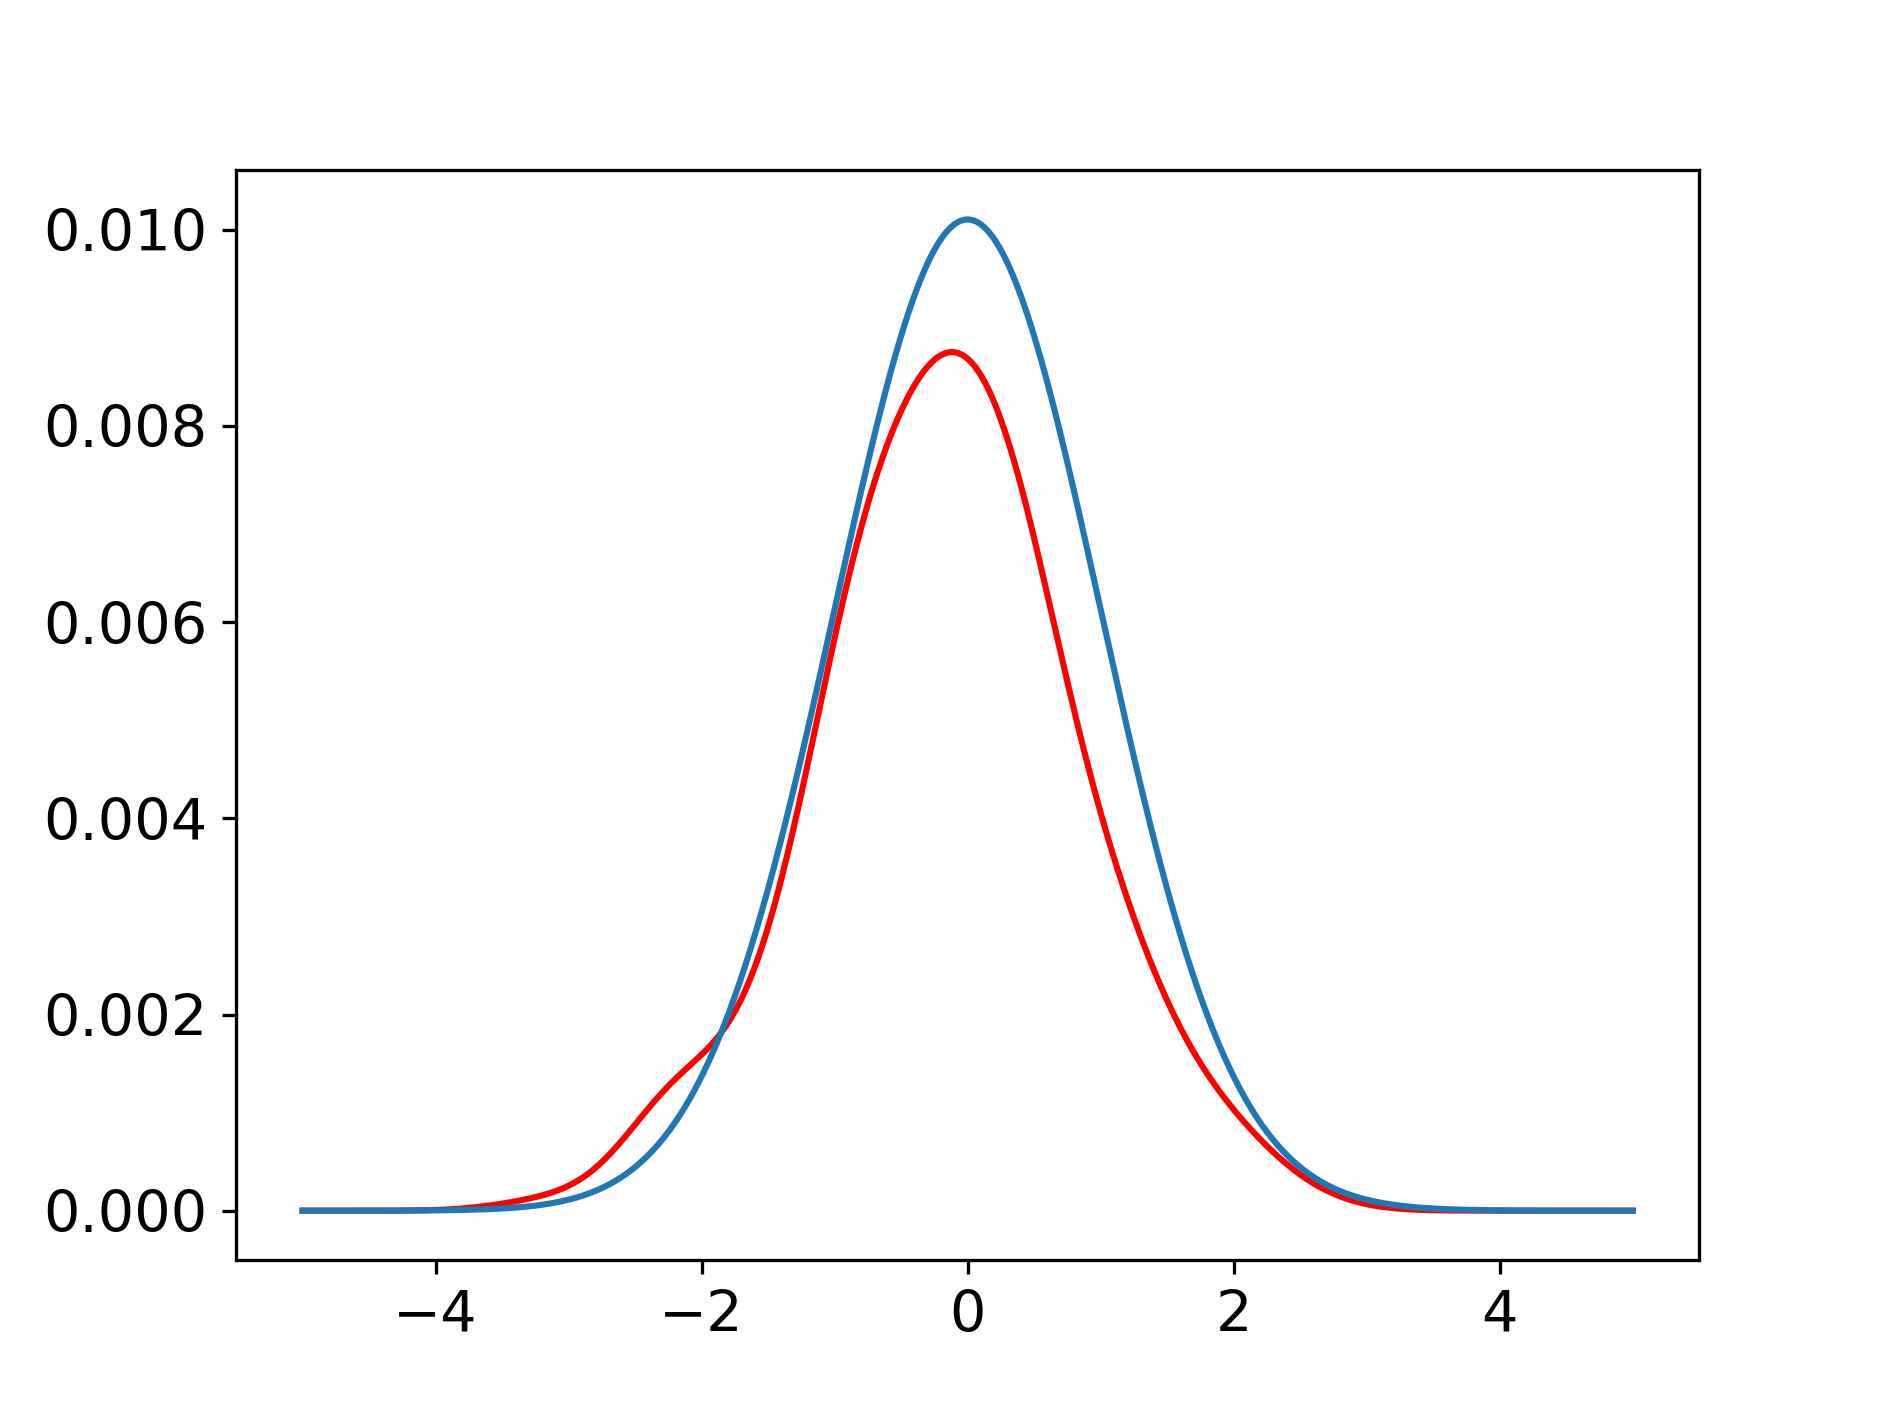

In [8]:
pts = pts1 # Choose a direction to plot the density

plt.figure()
plt.plot(x,prior_dens_kde.evaluate(pts),'r')
plt.plot(x,prior_dens.pdf(pts.transpose()))

## QoI: $q=\sum_{i=1}^n \lambda_i$

In [9]:
q = np.sum(lam,axis=0)
print(q.shape)

(10000,)


## Push-forward density

In [10]:
pf_dens = gkde(q)

## Import `scipy.stats` to construct observed density

In [12]:
# Let's be silly and use a uniform observed density.
obs_dens = sstats.uniform(loc=0, scale=4)

## Accept/reject sampling of posterior if samples come from prior

In [13]:
lam_accept = []
r = obs_dens.pdf(q)/pf_dens.evaluate(q)
M = np.max(r)
eta_r = r/M
for i in range(num_samples):
    xi = np.random.uniform(0,1)
    if eta_r[i] > xi:
        lam_accept.append(lam[:,i])

In [14]:
lam_accept = np.array(lam_accept)

<IPython.core.display.Javascript object>


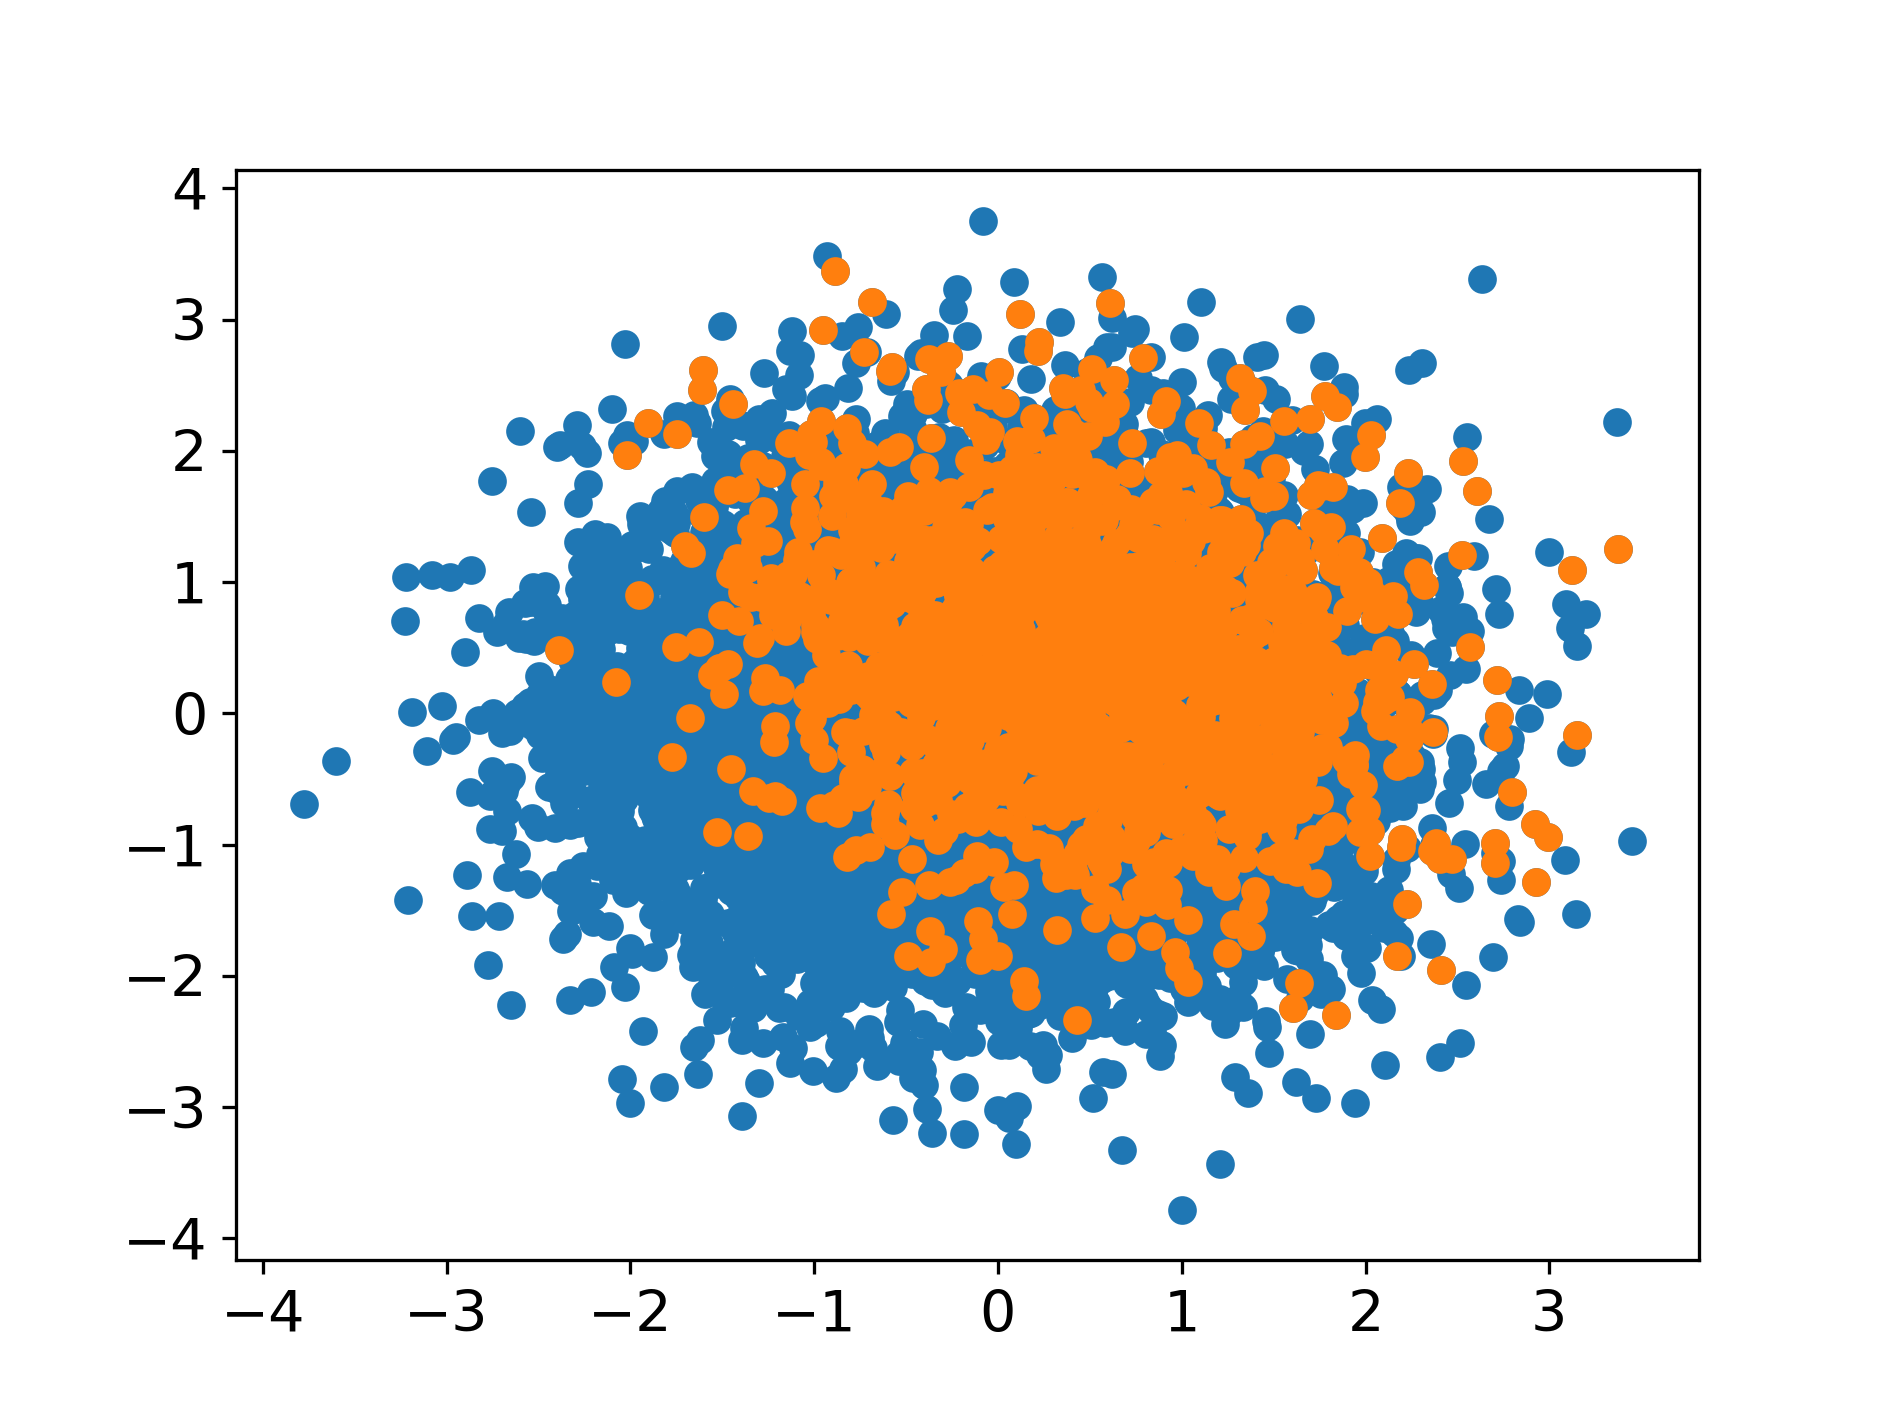

In [15]:
plt.figure()
plt.scatter(lam[0,:],lam[1,:])
plt.scatter(lam_accept[:,0],lam_accept[:,1])

## What we could do but I wouldn't recommend it.

We could use the accepted samples to create a KDE of the posterior, but in general I would not do this for at least one of the following reasons:

   - The number of accepted samples may be rather small for constructing an accurate KDE approximation.
   
   - The dimension of the parameter space is often fairly high which complicates using a KDE.
   
   - It is not as if you can really sample easily from the KDE once you have it.

In [ ]:
post_dens = gkde(lam_accept.transpose()) # Not very useful

In [ ]:
# Can plot "slices" of densities to observe differences between posterior and prior, but not that useful
pts = pts1

plt.figure()
plt.plot(x, post_dens.evaluate(pts),'r')
plt.plot(x, prior_dens.pdf(pts.transpose()))

## But there is "one"-direction that matters in $\Lambda$.

In my previous work, a transverse parameterization (TP) is defined as an indexing manifold (possibly piecewise defined) for the contours that is in 1-1 correspondence with the data space. 

Effectively, constructing the posterior density on the TP is equivalent to constructing the push-forward of the posterior.

In [ ]:
pf_post_dens = gkde(np.sum(lam_accept.transpose(),axis=0)) #Construct the push-forward of the posterior used accepted samples

In [ ]:
plt.figure()
plt.plot(x,pf_post_dens.evaluate(x),'r') #Plot the push-forward of the posterior, should look like the observed density
plt.plot(x,obs_dens.pdf(x))

# Now suppose we used a different QoI

## QoI: $q=\lambda_1$

In [ ]:
q = lam[0,:]
print(q.shape)

## Push-forward density

In [ ]:
pf_dens = gkde(q)

## Import `scipy.stats` to construct observed density

In [ ]:
obs_dens = sstats.uniform(0, 2)

## Accept/reject sampling of posterior

In [ ]:
lam_accept = []
r = obs_dens.pdf(q)/pf_dens.evaluate(q)
M = np.max(r)
eta_r = r/M
for i in range(num_samples):
    xi = np.random.uniform(0,1)
    if eta_r[i] > xi:
        lam_accept.append(lam[:,i])

In [ ]:
lam_accept = np.array(lam_accept)

In [ ]:
plt.figure()
plt.scatter(lam[0,:],lam[1,:])
plt.scatter(lam_accept[:,0],lam_accept[:,1])

In [ ]:
def pltaccept(N):
    plt.figure()
    plt.scatter(lam[0,:],lam[1,:],s=2)
    plt.scatter(lam_accept[0:N,0],lam_accept[0:N,1],s=4)

num_accept = lam_accept.shape[0]
interact(pltaccept, N=(1,num_accept,10))

In [ ]:
post_dens = gkde(lam_accept.transpose()) #Again, not that useful

In [ ]:
pts = pts1

plt.figure()
plt.plot(x, post_dens.evaluate(pts),'r') #Again...not that useful
plt.plot(x, prior_dens.pdf(pts.transpose()))

In [ ]:
post_dens_TP = gkde(lam_accept[:,0])

In [ ]:
plt.figure()
plt.plot(x,post_dens_TP.evaluate(x))